## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.models import Model
from keras.layers import Dense, Input


def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input = Input(input_shape)
    for i, n in enumerate(num_neurons):
      if i == 0:
        x = Dense(n, activation='relu')(input)
      else: 
        x = Dense(n, activation='relu')(x)
    output = Dense(output_units, activation='softmax')(x)
    model = Model(inputs=[input], outputs=[output])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 10 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.1, 0.3, 0.5]  #  https://keras.io/zh/callbacks/
redice_lr_patient = [5,10]

In [8]:

# what is itertools.product

import itertools
a = [1,2,3]
b = [-1, -2, -3]
results = {}
for i, (n, m) in enumerate(itertools.product(a, b)):
  print(i, n, m)

0 1 -1
1 1 -2
2 1 -3
3 2 -1
4 2 -2
5 2 -3
6 3 -1
7 3 -2
8 3 -3


In [9]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr  = ReduceLROnPlateau(factor= reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.10, reduce_patient: 5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 49us/step - loss: 2.2429 - accuracy: 0.1816 - val_loss: 2.1575 - val_accuracy: 0.2521
Epoch 2/10
50000/50000 [==============================] - 2s 47us/step - loss: 2.0784 - accuracy: 0.2820 - val_loss: 2.0068 - val_accuracy: 0.3111
Epoch 3/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.9605 - accuracy: 0.3158 - val_loss: 1.9215 - val_accuracy: 0.3285
Epoch 4/10
50000/50000 [==============================] - 2s 47us/step - loss: 1.8944 - accuracy: 0.3362 - val_loss: 1.8715 - val_accuracy: 0.3450
Epoch 5/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.8515 - accuracy: 0.3529 - val_loss: 1.8343 - val_accuracy: 0.3589
Epoch 6/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.8195 - accuracy: 0.3647 - val_loss: 1.8073 - val_accuracy: 0.3704
Epoch 7/10
50000/50000 [==============================] - 2s 48us/st

50000/50000 [==============================] - 2s 50us/step - loss: 1.7038 - accuracy: 0.3911 - val_loss: 1.6468 - val_accuracy: 0.4169
Epoch 4/10
50000/50000 [==============================] - 2s 50us/step - loss: 1.6263 - accuracy: 0.4214 - val_loss: 1.6004 - val_accuracy: 0.4303
Epoch 5/10
50000/50000 [==============================] - 2s 50us/step - loss: 1.5784 - accuracy: 0.4404 - val_loss: 1.5936 - val_accuracy: 0.4354ss: 1.584
Epoch 6/10
50000/50000 [==============================] - 2s 50us/step - loss: 1.5433 - accuracy: 0.4535 - val_loss: 1.5440 - val_accuracy: 0.4538
Epoch 7/10
50000/50000 [==============================] - 3s 50us/step - loss: 1.5052 - accuracy: 0.4629 - val_loss: 1.5000 - val_accuracy: 0.4604
Epoch 8/10
50000/50000 [==============================] - 3s 51us/step - loss: 1.4730 - accuracy: 0.4772 - val_loss: 1.4883 - val_accuracy: 0.4748
Epoch 9/10
50000/50000 [==============================] - 3s 50us/step - loss: 1.4373 - accuracy: 0.4885 - val_loss: 1.4

Epoch 6/10
50000/50000 [==============================] - 3s 50us/step - loss: 1.6447 - accuracy: 0.4101 - val_loss: 1.6280 - val_accuracy: 0.4173
Epoch 7/10
50000/50000 [==============================] - 2s 50us/step - loss: 1.6195 - accuracy: 0.4189 - val_loss: 1.6112 - val_accuracy: 0.4238
Epoch 8/10
50000/50000 [==============================] - 3s 51us/step - loss: 1.6001 - accuracy: 0.4274 - val_loss: 1.5981 - val_accuracy: 0.4299
Epoch 9/10
50000/50000 [==============================] - 3s 50us/step - loss: 1.5824 - accuracy: 0.4336 - val_loss: 1.5818 - val_accuracy: 0.4338
Epoch 10/10
50000/50000 [==============================] - 3s 52us/step - loss: 1.5622 - accuracy: 0.4413 - val_loss: 1.5698 - val_accuracy: 0.4423
Numbers of exp: 10, reduce_factor: 0.50, reduce_patient: 5
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              

Epoch 9/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.7585 - accuracy: 0.3689 - val_loss: 1.8344 - val_accuracy: 0.3629
Epoch 10/10
50000/50000 [==============================] - 2s 49us/step - loss: 1.7440 - accuracy: 0.3760 - val_loss: 1.8332 - val_accuracy: 0.3395
Numbers of exp: 13, reduce_factor: 0.10, reduce_patient: 10
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_54 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 49us/step - loss: 2.4846 - accuracy: 0.1648 - val_loss: 2.0513 - val_accuracy: 0.2528
Epoch 2/10
50000/50000 [==============================] - 2s 48us/step - loss: 2.1114 - accuracy: 0.2286 - val_loss: 2.2113 - val_accuracy: 0.2190
Epoch 3/10
50000/50000 [==============================] - 2s 48us/step - loss: 2.0130 - accuracy: 0.2701 - val_loss: 1.9494 - val_accuracy: 0.2939
Epoch 4/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.9341 - accuracy: 0.3011 - val_loss: 2.0845 - val_accuracy: 0.2372
Epoch 5/10
50000/50000 [==============================] - 2s 49us/step - loss: 1.8877 - accuracy: 0.3176 - val_loss: 1.9062 - val_accuracy: 0.3145
Epoch 6/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.8406 - accuracy: 0.3352 - val_loss: 1.8273 - val_accuracy: 0.3523
Epoch 7/10
50000/50000 [==============================] - 2s 49us/st

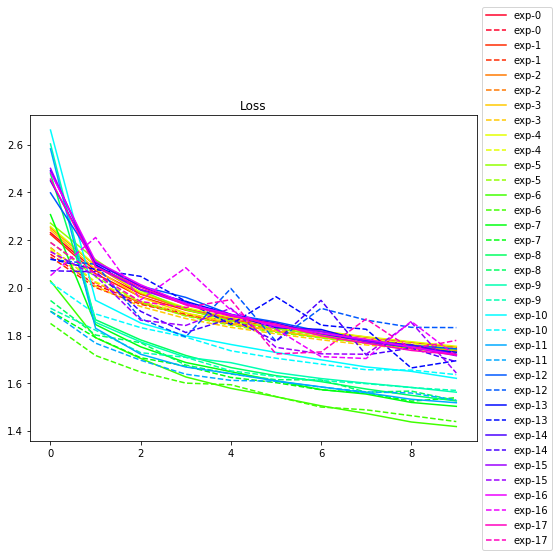

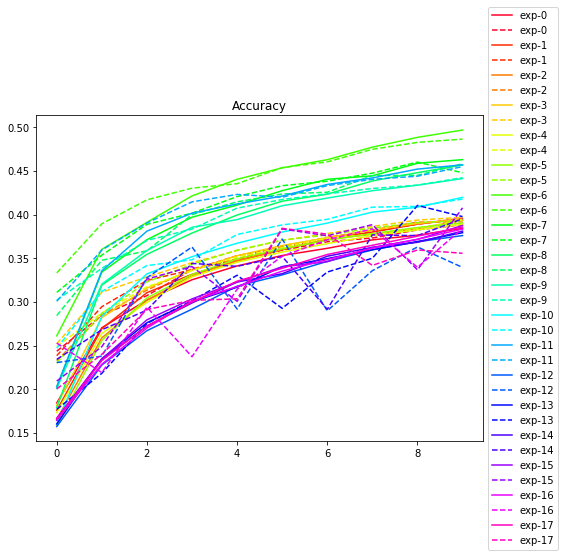

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()